In [1]:
import spacy
import os
import pandas as pd
import re

In [2]:
nlp = spacy.load("en_core_web_md")

Theres a lot to filter, see [this](http://localhost:8889/tree/Documents/Uni/DH/Data%20Science/Projekte/Topic%20Modelling/corpus_base/16338845__IM-PRESS__20050826-IPR-01421__EN.txt).

In [3]:
# Define the folder path
folder_path = 'corpus_base'

# Initialize lists to store data
titles = []
categories = []
contents = []
filenames = []

date_pattern = r'\d{4}-\d{2}-\d{2} - \d{2}:\d{2}'
dates_pattern = r'\d{2}\.\d{2}\.\d{2}'
phone_pattern = r'\(\+\d*\)\s\d*\s\d*\s\d*'
mark_pattern = r'[A-Z]{4,}'
ref_pattern = r'\d+\w+\d+'
mail_pattern = r'.*\@.*\.eu'

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    # Check if file has .txt extension
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            
            # Extract title, category, and content
            title = lines[0].strip()
            category = lines[1].strip()
            content_lines = lines[2:]  # Exclude the first two lines
            
            # Remove weird stuff
            content_lines = [re.sub(r'\/\S*', '', line) for line in content_lines]
            content_lines = [re.sub(date_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(r'\*\.jpg', '', line) for line in content_lines]
            content_lines = [re.sub(phone_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(mark_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(ref_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(mail_pattern, '', line) for line in content_lines]
            
            # Remove batches of 3 lines
            content_lines = [line for line in content_lines if not line.startswith((r'\d', 'LINK', 'EN'))]
            
            # Join the remaining lines to form the content
            content = ' '.join(content_lines).strip()            
            
            # Append data to lists
            titles.append(title)
            categories.append(category)
            contents.append(content)
            filenames.append(file_name)

# Create a pandas dataframe
data = {
    'title': titles,
    'category': categories,
    'content': contents,
    'filename': filenames
}

df = pd.DataFrame(data)
df

title  \
0     EU should cooperate more with US in Mediterran...   
1                     Broader EU-China Relations Needed   
2     Transport Committee demands EU-wide blacklist ...   
3     Compliance with Hague tribunal is key to acces...   
4     Commissioner Rehn defends "rigorous" framework...   
...                                                 ...   
7241       Basic rights for crime victims across the EU   
7242  Mobile roaming: MEPs win deal with Council to ...   
7243  Opening: President Schulz condemns Toulouse ki...   
7244  Food aid for needy beyond 2013: Commission fol...   
7245  Professor: EU's agricultural policy needs to b...   

                         category  \
0     Development and cooperation   
1              External relations   
2                       Transport   
3              External relations   
4              External relations   
...                           ...   
7241         Judicial cooperation   
7242          Information society   
7243                 Institutions   
7244                  Agriculture   
7245                  Environment   

                                                content  \
0     MEPs are disappointed with the results achieve...   
1     A longer-term trade strategy needs to be devis...   
2     Following a number of serious air crashes earl...   
3     Speaking to the Foreign Affairs Committee on 3...   
4     Appearing before the Foreign Affairs Committee...   
...                                                 ...   
7241  Committees Civil Liberties, Justice and Home A...   
7242  Committees Industry, Research and Energy\n \n ...   
7243  Plenary sittings\n \n  The recent callous and ...   
7244  Plenary sittings\n \n  In times of economic cr...   
7245  A woman cropping corn salad at an organic farm...   

                                            filename  
0     16338845__IM-PRESS__20050826-IPR-01421__EN.txt  
1     16338859__IM-PRESS__20050907-IPR-00044__EN.txt  
2     16338887__IM-PRESS__20050907-IPR-00050__EN.txt  
3     16338915__IM-PRESS__20050907-IPR-00048__EN.txt  
4     16338929__IM-PRESS__20050826-IPR-01417__EN.txt  
...                                              ...  
7241  33730400__IM-PRESS__20120326-IPR-41845__EN.txt  
7242  33732813__IM-PRESS__20120326-IPR-41842__EN.txt  
7243  33734304__IM-PRESS__20120328-IPR-42022__EN.txt  
7244  33735269__IM-PRESS__20120327-IPR-41991__EN.txt  
7245  33736002__IM-PRESS__20120322-STO-41648__EN.txt  

[7246 rows x 4 columns]

In [4]:
stopwords = list(nlp.Defaults.stop_words)+['%', '.', "?", "!", ",", "(", ")", ":", ";", "\"", "'", "=", "-", "--en", "http", "v0", "xml", "im-", "doc", "avi", 'XML', 'DOC', 'AVI', 'IM-', '.jpg']
stoptags = ['ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SYM', 'SPACE']

In [5]:
stopwords

['almost',
 'never',
 'see',
 '‘m',
 '‘re',
 'herein',
 'namely',
 'an',
 'otherwise',
 'around',
 'them',
 'empty',
 "'ve",
 'must',
 'though',
 'too',
 'as',
 'hereupon',
 'three',
 '‘ve',
 'they',
 'move',
 "'d",
 'same',
 'whoever',
 'sometimes',
 'various',
 'across',
 'next',
 'fifty',
 'from',
 'without',
 'perhaps',
 'whole',
 'name',
 'against',
 'others',
 'nowhere',
 'and',
 'where',
 'still',
 'six',
 'seems',
 'up',
 'whatever',
 'beforehand',
 'full',
 'eleven',
 'myself',
 'yours',
 'herself',
 'this',
 'whereafter',
 'we',
 'i',
 'or',
 'behind',
 'doing',
 'really',
 'keep',
 'until',
 'much',
 'again',
 'please',
 'hers',
 'thru',
 'five',
 'eight',
 'everywhere',
 'third',
 'anything',
 'could',
 'part',
 'made',
 'of',
 'our',
 'can',
 "'m",
 'itself',
 'whereupon',
 'will',
 'elsewhere',
 'indeed',
 'just',
 'he',
 'wherever',
 'whose',
 'give',
 'themselves',
 'something',
 'mine',
 'further',
 'yet',
 'when',
 'over',
 'used',
 'another',
 'mostly',
 'your',
 'be

In [6]:
df["tokens"] = df.title.apply(lambda x: [t.lemma_.lower() for t in nlp(x, disable=["parser", "ner"]) if (t.text.strip() != "" and (t.text.lower() not in stopwords) and t.pos_ not in stoptags)])

In [7]:
df.iloc[356].tokens

['european', 'bathing', 'water', 'directive', 'ensure', 'uk', 'beach', 'clean']

In [18]:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=3, no_above=0.1)

l = list(dictionary.items())
print(len(l))
print(l)

2202
[(0, 'cooperate'), (1, 'mediterranean'), (2, 'region'), (3, 'broad'), (4, 'china'), (5, 'air'), (6, 'blacklist'), (7, 'committee'), (8, 'demand'), (9, 'transport'), (10, 'wide'), (11, 'accession'), (12, 'compliance'), (13, 'croatia'), (14, 'foreign'), (15, 'hague'), (16, 'key'), (17, 'minister'), (18, 'say'), (19, 'tribunal'), (20, 'commissioner'), (21, 'defend'), (22, 'framework'), (23, 'negotiation'), (24, 'rehn'), (25, 'turkey'), (26, 'cooperation'), (27, 'india'), (28, 'keen'), (29, 'strengthen'), (30, 'home'), (31, 'priority'), (32, 'right'), (33, 'secretary'), (34, 'security'), (35, 'tell'), (36, 'uk'), (37, 'agency'), (38, 'europe'), (39, 'fundamental'), (40, 'monitor'), (41, 'new'), (42, 'citizen'), (43, 'european'), (44, 'influence'), (45, 'irish'), (46, 'law'), (47, 'petition'), (48, 'child'), (49, 'medicine'), (50, 'special'), (51, 'country'), (52, 'drug'), (53, 'export'), (54, 'generic'), (55, 'move'), (56, 'poor'), (57, 'simplify'), (58, 'agreement'), (59, 'aid'), (60

In [19]:
corpus = [dictionary.doc2bow(a) for a in df['tokens']]

In [20]:
from gensim.models import LdaMulticore

In [22]:
# We will execute topic modeling 50 times, each time with the different number of topics
max_topics = 30 
models = []

for i in range(max_topics):
    print("Training LDA with " + str(i+1) + " topics.")
    
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=i+1, workers = 4)
    models.append(lda_model)
          
print("Done.")

Training LDA with 1 topics.
Training LDA with 2 topics.
Training LDA with 3 topics.
Training LDA with 4 topics.
Training LDA with 5 topics.
Training LDA with 6 topics.
Training LDA with 7 topics.
Training LDA with 8 topics.
Training LDA with 9 topics.
Training LDA with 10 topics.
Training LDA with 11 topics.
Training LDA with 12 topics.
Training LDA with 13 topics.
Training LDA with 14 topics.
Training LDA with 15 topics.
Training LDA with 16 topics.
Training LDA with 17 topics.
Training LDA with 18 topics.
Training LDA with 19 topics.
Training LDA with 20 topics.
Training LDA with 21 topics.
Training LDA with 22 topics.
Training LDA with 23 topics.
Training LDA with 24 topics.
Training LDA with 25 topics.
Training LDA with 26 topics.
Training LDA with 27 topics.
Training LDA with 28 topics.
Training LDA with 29 topics.
Training LDA with 30 topics.
Done.


In [23]:
from gensim.models import CoherenceModel

coherence_measures = ['u_mass']
scores = pd.DataFrame(columns=coherence_measures)
for measure in coherence_measures:
    scores_temp = []
    for i in range(len(models)):
        print("Computing " + str(measure) +" for the LDA model with " + str(i+1) + " topics.")
        cm = CoherenceModel(model=models[i], corpus=corpus, texts = df["tokens"], dictionary=dictionary, coherence=measure)
        score = cm.get_coherence()
        scores_temp.append(score)
    scores[measure] = scores_temp
    print("Done with " + measure)
print("Done.")

Computing u_mass for the LDA model with 1 topics.
Computing u_mass for the LDA model with 2 topics.
Computing u_mass for the LDA model with 3 topics.
Computing u_mass for the LDA model with 4 topics.
Computing u_mass for the LDA model with 5 topics.
Computing u_mass for the LDA model with 6 topics.
Computing u_mass for the LDA model with 7 topics.
Computing u_mass for the LDA model with 8 topics.
Computing u_mass for the LDA model with 9 topics.
Computing u_mass for the LDA model with 10 topics.
Computing u_mass for the LDA model with 11 topics.
Computing u_mass for the LDA model with 12 topics.
Computing u_mass for the LDA model with 13 topics.
Computing u_mass for the LDA model with 14 topics.
Computing u_mass for the LDA model with 15 topics.
Computing u_mass for the LDA model with 16 topics.
Computing u_mass for the LDA model with 17 topics.
Computing u_mass for the LDA model with 18 topics.
Computing u_mass for the LDA model with 19 topics.
Computing u_mass for the LDA model with 

In [24]:
import matplotlib.pyplot as plt
import numpy as np

num_topics = [i+1 for i in range(max_topics)]

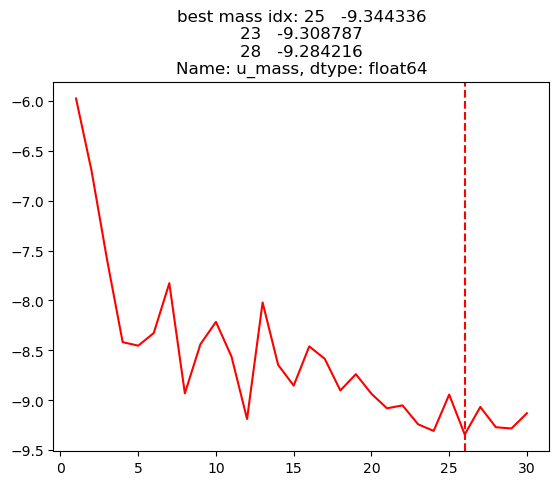

In [25]:
#fig, axes = plt.subplots(nrows=2, ncols=2)
#best_v = scores['c_v'].nlargest(3)

#axes[0, 0].plot(num_topics, list(scores['c_v']), color='purple')
#axes[0, 0].axvline(x=scores['c_v'].idxmax()+1, color='r', linestyle='solid')
#axes[0, 0].set_title(f'best v idx: {best_v}')

#best_npmi = scores['c_npmi'].nlargest(3)

#axes[0, 1].plot(num_topics, list(scores['c_npmi']), color='green')
#axes[0, 1].axvline(x=scores['c_npmi'].idxmax()+1, color='r', linestyle='dotted')
#axes[0, 1].set_title(f'best npmi idx: {best_npmi}')

best_mass = scores['u_mass'].nsmallest(3)

plt.plot(num_topics, list(scores['u_mass']), color='red')
plt.axvline(x=scores['u_mass'].idxmin()+1, color='r', linestyle='dashed')
plt.title(f'best mass idx: {best_mass}')

#best_uci = scores['c_uci'].nlargest(3)
                                
#axes[1, 1].plot(num_topics, list(scores['c_uci']), color='blue')
#axes[1, 1].axvline(x=scores['c_uci'].idxmax()+1, color='r', linestyle='dashdot')
#axes[1, 1].set_title(f'best uci idx: {best_uci}')

#plt.tight_layout()
plt.show()

In [28]:
models[12].print_topics(num_words=6, num_topics=max_topics)

[(0,
  '0.034*"week" + 0.021*"european" + 0.017*"plenary" + 0.013*"briefing" + 0.013*"brussels" + 0.013*"session"'),
 (1,
  '0.022*"committee" + 0.021*"meps" + 0.014*"european" + 0.013*"need" + 0.013*"plenary" + 0.010*"ep"'),
 (2,
  '0.018*"week" + 0.013*"meps" + 0.012*"european" + 0.012*"committee" + 0.010*"debate" + 0.009*"new"'),
 (3,
  '0.027*"european" + 0.018*"week" + 0.011*"need" + 0.010*"committee" + 0.009*"right" + 0.008*"support"'),
 (4,
  '0.026*"european" + 0.017*"debate" + 0.013*"new" + 0.012*"right" + 0.008*"trade" + 0.008*"ep"'),
 (5,
  '0.021*"ep" + 0.017*"europe" + 0.015*"european" + 0.013*"prize" + 0.011*"new" + 0.010*"president"'),
 (6,
  '0.013*"europe" + 0.013*"need" + 0.012*"aid" + 0.011*"budget" + 0.010*"right" + 0.010*"committee"'),
 (7,
  '0.036*"week" + 0.024*"european" + 0.015*"meps" + 0.014*"europe" + 0.011*"ep" + 0.009*"economic"'),
 (8,
  '0.032*"european" + 0.012*"ep" + 0.011*"crisis" + 0.010*"prize" + 0.010*"new" + 0.010*"meps"'),
 (9,
  '0.037*"week" + 

In [29]:
for doc_id, doc in enumerate(corpus):
# Iterate over each document in the corpus
    # Get the topic distribution for the document
    topic_distribution = models[12].get_document_topics(doc)
    
    # Print the topic distribution for the current document
    print(f"Document ID: {doc_id}")
    for topic_id, topic_prob in topic_distribution:
        print(f"Topic ID: {topic_id}, Probability: {topic_prob}")
    print()


Document ID: 0
Topic ID: 0, Probability: 0.01923760212957859
Topic ID: 1, Probability: 0.019236592575907707
Topic ID: 2, Probability: 0.019238155335187912
Topic ID: 3, Probability: 0.7691558599472046
Topic ID: 4, Probability: 0.019236931577324867
Topic ID: 5, Probability: 0.019237421452999115
Topic ID: 6, Probability: 0.01923719234764576
Topic ID: 7, Probability: 0.019236622378230095
Topic ID: 8, Probability: 0.019237052649259567
Topic ID: 9, Probability: 0.019236652180552483
Topic ID: 10, Probability: 0.019236546009778976
Topic ID: 11, Probability: 0.01923677884042263
Topic ID: 12, Probability: 0.019236618652939796

Document ID: 1
Topic ID: 0, Probability: 0.025645000860095024
Topic ID: 1, Probability: 0.6922590732574463
Topic ID: 2, Probability: 0.025644926354289055
Topic ID: 3, Probability: 0.025645025074481964
Topic ID: 4, Probability: 0.025645045563578606
Topic ID: 5, Probability: 0.025644995272159576
Topic ID: 6, Probability: 0.02564559318125248
Topic ID: 7, Probability: 0.025644

Document ID: 291
Topic ID: 0, Probability: 0.025642044842243195
Topic ID: 1, Probability: 0.025641994550824165
Topic ID: 2, Probability: 0.025642329826951027
Topic ID: 3, Probability: 0.025642193853855133
Topic ID: 4, Probability: 0.025642067193984985
Topic ID: 5, Probability: 0.0256425179541111
Topic ID: 6, Probability: 0.02564224973320961
Topic ID: 7, Probability: 0.692294180393219
Topic ID: 8, Probability: 0.025642219930887222
Topic ID: 9, Probability: 0.025642145425081253
Topic ID: 10, Probability: 0.025642039254307747
Topic ID: 11, Probability: 0.02564201131463051
Topic ID: 12, Probability: 0.025641996413469315

Document ID: 292
Topic ID: 0, Probability: 0.010991411283612251
Topic ID: 1, Probability: 0.8681031465530396
Topic ID: 2, Probability: 0.010991382412612438
Topic ID: 3, Probability: 0.010991446673870087
Topic ID: 4, Probability: 0.010991520248353481
Topic ID: 5, Probability: 0.010991375893354416
Topic ID: 6, Probability: 0.010991349816322327
Topic ID: 7, Probability: 0.010

Document ID: 388
Topic ID: 0, Probability: 0.012825708836317062
Topic ID: 1, Probability: 0.012825596146285534
Topic ID: 2, Probability: 0.012825541198253632
Topic ID: 3, Probability: 0.012825721874833107
Topic ID: 4, Probability: 0.012825753539800644
Topic ID: 5, Probability: 0.012825526297092438
Topic ID: 6, Probability: 0.0128258615732193
Topic ID: 7, Probability: 0.012825548648834229
Topic ID: 8, Probability: 0.6326048970222473
Topic ID: 9, Probability: 0.012825801968574524
Topic ID: 10, Probability: 0.22631295025348663
Topic ID: 11, Probability: 0.01282555516809225
Topic ID: 12, Probability: 0.012825526297092438

Document ID: 389
Topic ID: 0, Probability: 0.7692248821258545
Topic ID: 1, Probability: 0.01923121139407158
Topic ID: 2, Probability: 0.019231189042329788
Topic ID: 3, Probability: 0.019231287762522697
Topic ID: 4, Probability: 0.019231179729104042
Topic ID: 5, Probability: 0.01923110894858837
Topic ID: 6, Probability: 0.01923120766878128
Topic ID: 7, Probability: 0.01923

Document ID: 882
Topic ID: 0, Probability: 0.010989767499268055
Topic ID: 1, Probability: 0.010989825241267681
Topic ID: 2, Probability: 0.010989799164235592
Topic ID: 3, Probability: 0.010989791713654995
Topic ID: 4, Probability: 0.010989753529429436
Topic ID: 5, Probability: 0.010989776812493801
Topic ID: 6, Probability: 0.010989774949848652
Topic ID: 7, Probability: 0.010989836417138577
Topic ID: 8, Probability: 0.010989723727107048
Topic ID: 9, Probability: 0.01098979078233242
Topic ID: 10, Probability: 0.8681225180625916
Topic ID: 11, Probability: 0.010989794507622719
Topic ID: 12, Probability: 0.010989818722009659

Document ID: 883
Topic ID: 0, Probability: 0.01923210360109806
Topic ID: 1, Probability: 0.019232183694839478
Topic ID: 2, Probability: 0.019232096150517464
Topic ID: 3, Probability: 0.01923206076025963
Topic ID: 4, Probability: 0.019232306629419327
Topic ID: 5, Probability: 0.019232328981161118
Topic ID: 6, Probability: 0.7692136764526367
Topic ID: 7, Probability: 0.0

Document ID: 1305
Topic ID: 0, Probability: 0.015385817736387253
Topic ID: 1, Probability: 0.015385753475129604
Topic ID: 2, Probability: 0.015385848470032215
Topic ID: 3, Probability: 0.015385803766548634
Topic ID: 4, Probability: 0.015385947190225124
Topic ID: 5, Probability: 0.01538584753870964
Topic ID: 6, Probability: 0.015385826118290424
Topic ID: 7, Probability: 0.5147834420204163
Topic ID: 8, Probability: 0.015385792590677738
Topic ID: 9, Probability: 0.015385840088129044
Topic ID: 10, Probability: 0.015385935083031654
Topic ID: 11, Probability: 0.015385984443128109
Topic ID: 12, Probability: 0.3159721791744232

Document ID: 1306
Topic ID: 0, Probability: 0.012822005897760391
Topic ID: 1, Probability: 0.012821871787309647
Topic ID: 2, Probability: 0.012822026386857033
Topic ID: 3, Probability: 0.01282200962305069
Topic ID: 4, Probability: 0.012821925804018974
Topic ID: 5, Probability: 0.846136748790741
Topic ID: 6, Probability: 0.012821982614696026
Topic ID: 7, Probability: 0.0

Document ID: 1686
Topic ID: 12, Probability: 0.8974104523658752

Document ID: 1687
Topic ID: 0, Probability: 0.025643615052103996
Topic ID: 1, Probability: 0.02564343810081482
Topic ID: 2, Probability: 0.02564326487481594
Topic ID: 3, Probability: 0.02564348839223385
Topic ID: 4, Probability: 0.02564331144094467
Topic ID: 5, Probability: 0.025643358007073402
Topic ID: 6, Probability: 0.025643348693847656
Topic ID: 7, Probability: 0.025643354281783104
Topic ID: 8, Probability: 0.0256436038762331
Topic ID: 9, Probability: 0.6922786831855774
Topic ID: 10, Probability: 0.025643959641456604
Topic ID: 11, Probability: 0.02564324624836445
Topic ID: 12, Probability: 0.025643328204751015

Document ID: 1688
Topic ID: 7, Probability: 0.8845957517623901

Document ID: 1689
Topic ID: 0, Probability: 0.025641659274697304
Topic ID: 1, Probability: 0.025641364976763725
Topic ID: 2, Probability: 0.025641651824116707
Topic ID: 3, Probability: 0.025641558691859245
Topic ID: 4, Probability: 0.0256414245814

Document ID: 2127
Topic ID: 5, Probability: 0.23169328272342682
Topic ID: 10, Probability: 0.6625268459320068

Document ID: 2128
Topic ID: 3, Probability: 0.8846054077148438

Document ID: 2129
Topic ID: 0, Probability: 0.07692307978868484
Topic ID: 1, Probability: 0.07692307978868484
Topic ID: 2, Probability: 0.07692307978868484
Topic ID: 3, Probability: 0.07692307978868484
Topic ID: 4, Probability: 0.07692307978868484
Topic ID: 5, Probability: 0.07692307978868484
Topic ID: 6, Probability: 0.07692307978868484
Topic ID: 7, Probability: 0.07692307978868484
Topic ID: 8, Probability: 0.07692307978868484
Topic ID: 9, Probability: 0.07692307978868484
Topic ID: 10, Probability: 0.07692307978868484
Topic ID: 11, Probability: 0.07692307978868484
Topic ID: 12, Probability: 0.07692307978868484

Document ID: 2130
Topic ID: 6, Probability: 0.8845909237861633

Document ID: 2131
Topic ID: 1, Probability: 0.8974299430847168

Document ID: 2132
Topic ID: 2, Probability: 0.44438084959983826
Topic ID: 5, 

Document ID: 2533
Topic ID: 0, Probability: 0.015388538129627705
Topic ID: 1, Probability: 0.015388581901788712
Topic ID: 2, Probability: 0.01538875326514244
Topic ID: 3, Probability: 0.015388562344014645
Topic ID: 4, Probability: 0.015388520434498787
Topic ID: 5, Probability: 0.01538859959691763
Topic ID: 6, Probability: 0.8153371214866638
Topic ID: 7, Probability: 0.01538864430040121
Topic ID: 8, Probability: 0.01538851484656334
Topic ID: 9, Probability: 0.01538851112127304
Topic ID: 10, Probability: 0.01538850273936987
Topic ID: 11, Probability: 0.015388590283691883
Topic ID: 12, Probability: 0.015388542786240578

Document ID: 2534
Topic ID: 0, Probability: 0.019231388345360756
Topic ID: 1, Probability: 0.01923108473420143
Topic ID: 2, Probability: 0.019231215119361877
Topic ID: 3, Probability: 0.019231239333748817
Topic ID: 4, Probability: 0.019231144338846207
Topic ID: 5, Probability: 0.019231082871556282
Topic ID: 6, Probability: 0.019231071695685387
Topic ID: 7, Probability: 0.7

Document ID: 2917
Topic ID: 0, Probability: 0.01923210732638836
Topic ID: 1, Probability: 0.019232047721743584
Topic ID: 2, Probability: 0.019232284277677536
Topic ID: 3, Probability: 0.019232073798775673
Topic ID: 4, Probability: 0.019232118502259254
Topic ID: 5, Probability: 0.01923206076025963
Topic ID: 6, Probability: 0.019232070073485374
Topic ID: 7, Probability: 0.019232071936130524
Topic ID: 8, Probability: 0.019232088699936867
Topic ID: 9, Probability: 0.019232016056776047
Topic ID: 10, Probability: 0.019232068210840225
Topic ID: 11, Probability: 0.019232047721743584
Topic ID: 12, Probability: 0.769214928150177

Document ID: 2918
Topic ID: 0, Probability: 0.5331701636314392
Topic ID: 1, Probability: 0.010990625247359276
Topic ID: 2, Probability: 0.010990670882165432
Topic ID: 3, Probability: 0.010990596376359463
Topic ID: 4, Probability: 0.34593307971954346
Topic ID: 5, Probability: 0.010990634560585022
Topic ID: 6, Probability: 0.010990550741553307
Topic ID: 7, Probability: 0.

Document ID: 3337
Topic ID: 3, Probability: 0.8974144458770752

Document ID: 3338
Topic ID: 6, Probability: 0.8846062421798706

Document ID: 3339
Topic ID: 0, Probability: 0.012822569347918034
Topic ID: 1, Probability: 0.012822790071368217
Topic ID: 2, Probability: 0.012822495773434639
Topic ID: 3, Probability: 0.012822559103369713
Topic ID: 4, Probability: 0.012822520919144154
Topic ID: 5, Probability: 0.012822634540498257
Topic ID: 6, Probability: 0.012822730466723442
Topic ID: 7, Probability: 0.012822555378079414
Topic ID: 8, Probability: 0.8461289405822754
Topic ID: 9, Probability: 0.01282262522727251
Topic ID: 10, Probability: 0.01282247994095087
Topic ID: 11, Probability: 0.01282254047691822
Topic ID: 12, Probability: 0.012822571210563183

Document ID: 3340
Topic ID: 0, Probability: 0.019234169274568558
Topic ID: 1, Probability: 0.01923406310379505
Topic ID: 2, Probability: 0.019233984872698784
Topic ID: 3, Probability: 0.01923408918082714
Topic ID: 4, Probability: 0.019234308972

Document ID: 3711
Topic ID: 0, Probability: 0.012822163291275501
Topic ID: 1, Probability: 0.012822057120501995
Topic ID: 2, Probability: 0.012821963056921959
Topic ID: 3, Probability: 0.012821881100535393
Topic ID: 4, Probability: 0.012821854092180729
Topic ID: 5, Probability: 0.012821925804018974
Topic ID: 6, Probability: 0.012821918353438377
Topic ID: 7, Probability: 0.8461363315582275
Topic ID: 8, Probability: 0.012821944430470467
Topic ID: 9, Probability: 0.012822241522371769
Topic ID: 10, Probability: 0.012821814976632595
Topic ID: 11, Probability: 0.01282198540866375
Topic ID: 12, Probability: 0.012821978889405727

Document ID: 3712
Topic ID: 0, Probability: 0.019231680780649185
Topic ID: 1, Probability: 0.019231919199228287
Topic ID: 2, Probability: 0.01923164166510105
Topic ID: 3, Probability: 0.019231712445616722
Topic ID: 4, Probability: 0.7692186832427979
Topic ID: 5, Probability: 0.01923149824142456
Topic ID: 6, Probability: 0.0192317645996809
Topic ID: 7, Probability: 0.0

Document ID: 4070
Topic ID: 1, Probability: 0.8974148035049438

Document ID: 4071
Topic ID: 0, Probability: 0.31707727909088135
Topic ID: 1, Probability: 0.562017560005188
Topic ID: 2, Probability: 0.010991428978741169
Topic ID: 3, Probability: 0.01099142525345087
Topic ID: 4, Probability: 0.010991365648806095
Topic ID: 5, Probability: 0.010991305112838745
Topic ID: 6, Probability: 0.010991341434419155
Topic ID: 7, Probability: 0.010991382412612438
Topic ID: 8, Probability: 0.010991431772708893
Topic ID: 9, Probability: 0.010991387069225311
Topic ID: 10, Probability: 0.01099131628870964
Topic ID: 11, Probability: 0.010991362854838371
Topic ID: 12, Probability: 0.010991404764354229

Document ID: 4072
Topic ID: 0, Probability: 0.019233210012316704
Topic ID: 1, Probability: 0.0192337017506361
Topic ID: 2, Probability: 0.01923326402902603
Topic ID: 3, Probability: 0.01923355460166931
Topic ID: 4, Probability: 0.0192333422601223
Topic ID: 5, Probability: 0.01923355832695961
Topic ID: 6, Pro

Document ID: 4496
Topic ID: 10, Probability: 0.8846039772033691

Document ID: 4497
Topic ID: 12, Probability: 0.907680332660675

Document ID: 4498
Topic ID: 0, Probability: 0.025641875341534615
Topic ID: 1, Probability: 0.02564128302037716
Topic ID: 2, Probability: 0.025641607120633125
Topic ID: 3, Probability: 0.025641534477472305
Topic ID: 4, Probability: 0.02564135752618313
Topic ID: 5, Probability: 0.025641286745667458
Topic ID: 6, Probability: 0.025641335174441338
Topic ID: 7, Probability: 0.025641823187470436
Topic ID: 8, Probability: 0.0256413035094738
Topic ID: 9, Probability: 0.02564193122088909
Topic ID: 10, Probability: 0.02564144693315029
Topic ID: 11, Probability: 0.02564147673547268
Topic ID: 12, Probability: 0.6923016905784607

Document ID: 4499
Topic ID: 0, Probability: 0.015388540923595428
Topic ID: 1, Probability: 0.015388610772788525
Topic ID: 2, Probability: 0.015388406813144684
Topic ID: 3, Probability: 0.01538838166743517
Topic ID: 4, Probability: 0.49027991294860

Document ID: 4882
Topic ID: 0, Probability: 0.025641953572630882
Topic ID: 1, Probability: 0.025641383603215218
Topic ID: 2, Probability: 0.02564157359302044
Topic ID: 3, Probability: 0.02564171515405178
Topic ID: 4, Probability: 0.025641487911343575
Topic ID: 5, Probability: 0.025641368702054024
Topic ID: 6, Probability: 0.025641363114118576
Topic ID: 7, Probability: 0.692301332950592
Topic ID: 8, Probability: 0.02564145252108574
Topic ID: 9, Probability: 0.025641703978180885
Topic ID: 10, Probability: 0.02564157173037529
Topic ID: 11, Probability: 0.0256415493786335
Topic ID: 12, Probability: 0.025641586631536484

Document ID: 4883
Topic ID: 0, Probability: 0.025642523542046547
Topic ID: 1, Probability: 0.02564138174057007
Topic ID: 2, Probability: 0.02564157173037529
Topic ID: 3, Probability: 0.02564171701669693
Topic ID: 4, Probability: 0.025641486048698425
Topic ID: 5, Probability: 0.025641366839408875
Topic ID: 6, Probability: 0.025641361251473427
Topic ID: 7, Probability: 0.6923

Document ID: 5283
Topic ID: 0, Probability: 0.025647707283496857
Topic ID: 1, Probability: 0.02564784325659275
Topic ID: 2, Probability: 0.025647517293691635
Topic ID: 3, Probability: 0.025647947564721107
Topic ID: 4, Probability: 0.025647670030593872
Topic ID: 5, Probability: 0.025647560134530067
Topic ID: 6, Probability: 0.025647878646850586
Topic ID: 7, Probability: 0.025647642090916634
Topic ID: 8, Probability: 0.025647887960076332
Topic ID: 9, Probability: 0.025647958740592003
Topic ID: 10, Probability: 0.6922265291213989
Topic ID: 11, Probability: 0.025647567585110664
Topic ID: 12, Probability: 0.025648290291428566

Document ID: 5284
Topic ID: 0, Probability: 0.012821552343666553
Topic ID: 1, Probability: 0.012821682728827
Topic ID: 2, Probability: 0.012821557931602001
Topic ID: 3, Probability: 0.012821546755731106
Topic ID: 4, Probability: 0.01282158400863409
Topic ID: 5, Probability: 0.01282153557986021
Topic ID: 6, Probability: 0.84614098072052
Topic ID: 7, Probability: 0.0128

Document ID: 5675
Topic ID: 0, Probability: 0.010989951901137829
Topic ID: 1, Probability: 0.010990042239427567
Topic ID: 2, Probability: 0.5127153396606445
Topic ID: 3, Probability: 0.3663944900035858
Topic ID: 4, Probability: 0.010990103706717491
Topic ID: 5, Probability: 0.010990065522491932
Topic ID: 6, Probability: 0.010990014299750328
Topic ID: 7, Probability: 0.010990017093718052
Topic ID: 8, Probability: 0.010989987291395664
Topic ID: 9, Probability: 0.010990038514137268
Topic ID: 10, Probability: 0.010989953763782978
Topic ID: 11, Probability: 0.010989964939653873
Topic ID: 12, Probability: 0.01098998449742794

Document ID: 5676
Topic ID: 0, Probability: 0.015386714600026608
Topic ID: 1, Probability: 0.015386789105832577
Topic ID: 2, Probability: 0.01538670901209116
Topic ID: 3, Probability: 0.015386726707220078
Topic ID: 4, Probability: 0.015386702492833138
Topic ID: 5, Probability: 0.015386766754090786
Topic ID: 6, Probability: 0.01538673136383295
Topic ID: 7, Probability: 0

Document ID: 6058
Topic ID: 7, Probability: 0.43675097823143005
Topic ID: 12, Probability: 0.4574644863605499

Document ID: 6059
Topic ID: 8, Probability: 0.89742112159729

Document ID: 6060
Topic ID: 0, Probability: 0.019232336431741714
Topic ID: 1, Probability: 0.019232377409934998
Topic ID: 2, Probability: 0.019232558086514473
Topic ID: 3, Probability: 0.7692101001739502
Topic ID: 4, Probability: 0.019232401624321938
Topic ID: 5, Probability: 0.019232580438256264
Topic ID: 6, Probability: 0.01923252083361149
Topic ID: 7, Probability: 0.019232871010899544
Topic ID: 8, Probability: 0.019232453778386116
Topic ID: 9, Probability: 0.01923252083361149
Topic ID: 10, Probability: 0.019232358783483505
Topic ID: 11, Probability: 0.01923241652548313
Topic ID: 12, Probability: 0.019232504069805145

Document ID: 6061
Topic ID: 0, Probability: 0.8153813481330872
Topic ID: 1, Probability: 0.0153848547488451
Topic ID: 2, Probability: 0.015384801663458347
Topic ID: 3, Probability: 0.0153848361223936

Document ID: 6460
Topic ID: 0, Probability: 0.012823100201785564
Topic ID: 1, Probability: 0.012823125347495079
Topic ID: 2, Probability: 0.012823063880205154
Topic ID: 3, Probability: 0.012823077850043774
Topic ID: 4, Probability: 0.01282311137765646
Topic ID: 5, Probability: 0.012823056429624557
Topic ID: 6, Probability: 0.012823117896914482
Topic ID: 7, Probability: 0.012823454104363918
Topic ID: 8, Probability: 0.012823078781366348
Topic ID: 9, Probability: 0.012823088094592094
Topic ID: 10, Probability: 0.012823044322431087
Topic ID: 11, Probability: 0.012823069468140602
Topic ID: 12, Probability: 0.8461226224899292

Document ID: 6461
Topic ID: 0, Probability: 0.6923021674156189
Topic ID: 1, Probability: 0.025641312822699547
Topic ID: 2, Probability: 0.02564145438373089
Topic ID: 3, Probability: 0.025641562417149544
Topic ID: 4, Probability: 0.02564140595495701
Topic ID: 5, Probability: 0.025641296058893204
Topic ID: 6, Probability: 0.02564132586121559
Topic ID: 7, Probability: 0.

Document ID: 6876
Topic ID: 4, Probability: 0.9230611324310303

Document ID: 6877
Topic ID: 0, Probability: 0.012822876684367657
Topic ID: 1, Probability: 0.01282287947833538
Topic ID: 2, Probability: 0.012822994962334633
Topic ID: 3, Probability: 0.01282286923378706
Topic ID: 4, Probability: 0.012822856195271015
Topic ID: 5, Probability: 0.012822887860238552
Topic ID: 6, Probability: 0.012823102064430714
Topic ID: 7, Probability: 0.846125066280365
Topic ID: 8, Probability: 0.012822886928915977
Topic ID: 9, Probability: 0.012822860851883888
Topic ID: 10, Probability: 0.0128228310495615
Topic ID: 11, Probability: 0.01282294001430273
Topic ID: 12, Probability: 0.01282298844307661

Document ID: 6878
Topic ID: 7, Probability: 0.9076794385910034

Document ID: 6879
Topic ID: 1, Probability: 0.34071552753448486
Topic ID: 7, Probability: 0.553489625453949

Document ID: 6880
Topic ID: 2, Probability: 0.8974227905273438

Document ID: 6881
Topic ID: 0, Probability: 0.019231732934713364
Topic ID: 

In [37]:
df.iloc[6].title

'Security must take priority over rights, UK Home Secretary tells MEPs'

In [31]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [38]:
lda_display = pyLDAvis.gensim_models.prepare(models[max_topics-1], corpus, dictionary)
pyLDAvis.display(lda_display)